In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow
!pip install ultralytics
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
 

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
import torch
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = YOLO('/content/drive/MyDrive/OCR/Weights/yolo/train300/weights/best.pt')

In [ ]:
image_path = "/content/drive/MyDrive/OCR/Test/8e39078f764dd5138c5c.jpg"

In [70]:
result = model.predict(image_path, conf = 0.55)
result[0].boxes


image 1/1 /content/drive/MyDrive/OCR/Test/8e39078f764dd5138c5c.jpg: 448x640 1 TD, 1 ST, 3 DCs, 1 B, 140.5ms
Speed: 5.0ms preprocess, 140.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 1., 0., 2., 2., 2.])
conf: tensor([0.9525, 0.8864, 0.7790, 0.7541, 0.6834, 0.6811])
data: tensor([[9.3707e+02, 3.5635e+02, 1.1644e+03, 4.8950e+02, 9.5245e-01, 3.0000e+00],
        [3.8674e+02, 5.5534e+01, 4.0914e+02, 7.5646e+01, 8.8644e-01, 1.0000e+00],
        [1.8522e+02, 5.8495e+01, 2.1171e+02, 7.6327e+01, 7.7897e-01, 0.0000e+00],
        [2.7926e+02, 7.4379e+01, 3.7346e+02, 9.2868e+01, 7.5415e-01, 2.0000e+00],
        [1.4926e+02, 7.6487e+01, 2.7499e+02, 9.2917e+01, 6.8345e-01, 2.0000e+00],
        [3.7747e+02, 7.6930e+01, 4.8712e+02, 9.5147e+01, 6.8108e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (887, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[1050.7117,  422.9239,  227.2847,  133.1486],
        [ 397.9398,   65.5898,   22.4005,   20.1123],
        [ 198.4669,   67.4106,   26.4919,   17.8320],
        [ 326.3599,   83.6236,   94.2067,   18.4895],
        [ 212.1245,   84.7018,  125.7252,   1

In [ ]:
label = []
coord = []
for r in result[0]:
  label.append(r.boxes.cls.numpy().astype(int)[0])
  coord.append(r.boxes.xyxy.numpy().astype(int)[0])

ans = list(zip(label, coord))

In [ ]:
for i in ans:
  print(i)

(3, array([ 937,  356, 1164,  489]))
(1, array([386,  55, 409,  75]))
(0, array([185,  58, 211,  76]))
(2, array([279,  74, 373,  92]))
(2, array([149,  76, 274,  92]))
(2, array([377,  76, 487,  95]))


In [ ]:
save_dir = '/content/drive/MyDrive/OCR/Cropped_Image'

In [ ]:
def display_img(image, x1, y1, x2, y2):
  cropped_image = image[y1:y2, x1:x2]

  plt.imshow(cropped_image)
  plt.show()
  return cropped_image

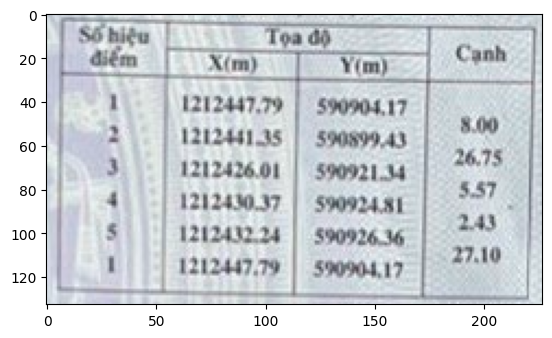

array([[[202, 210, 217],
        [183, 190, 199],
        [191, 198, 207],
        ...,
        [199, 208, 212],
        [207, 216, 220],
        [205, 214, 218]],

       [[211, 219, 226],
        [191, 198, 207],
        [188, 195, 204],
        ...,
        [205, 214, 218],
        [213, 222, 226],
        [210, 219, 223]],

       [[218, 227, 231],
        [206, 214, 221],
        [191, 199, 206],
        ...,
        [198, 207, 211],
        [204, 213, 217],
        [204, 213, 217]],

       ...,

       [[210, 218, 225],
        [209, 217, 224],
        [215, 223, 230],
        ...,
        [215, 224, 228],
        [217, 226, 229],
        [207, 216, 219]],

       [[209, 217, 224],
        [205, 213, 220],
        [214, 222, 229],
        ...,
        [217, 226, 230],
        [214, 223, 226],
        [200, 209, 212]],

       [[217, 225, 232],
        [205, 213, 220],
        [214, 222, 229],
        ...,
        [218, 227, 231],
        [219, 228, 231],
        [222, 231, 234]]], dtype=uint8)
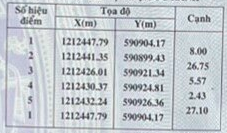

In [ ]:
image = cv2.imread(image_path)
x1, y1, x2, y2 = ans[0][1]
display_img(image, x1, y1, x2, y2)

In [ ]:
data = {
    "TD": [],
    "ST": [],
    "DC": [],
    "B": []
}

In [ ]:
key = list(data.keys())
key

['TD', 'ST', 'DC', 'B']

In [ ]:
for i in ans:
  print(i)
  if key[i[0]] == "DC":
    data[key[i[0]]].append(i[1])
    data["DC"].sort(key = lambda x: x[0])
  elif key[i[0]] == "TD":
    data[key[i[0]]].append(i[1])
    data["TD"].sort(key = lambda x: x[0])
  elif key[i[0]] == "ST":
    data[key[i[0]]].append(i[1])
    data["ST"].sort(key = lambda x: x[0])
  else:
    data[key[i[0]]] = i[1]



(3, array([ 937,  356, 1164,  489]))
(1, array([386,  55, 409,  75]))
(0, array([185,  58, 211,  76]))
(2, array([279,  74, 373,  92]))
(2, array([149,  76, 274,  92]))
(2, array([377,  76, 487,  95]))


In [ ]:
import os

In [ ]:
def saveCroppedImg(label, image):
  for idx, i in enumerate(data[f"{label}"]):
    cropped = display_img(image, i[0], i[1], i[2], i[3])
    cropped_image_path = os.path.join(save_dir, f'{label}_{idx + 1}.jpg')
    cv2.imwrite(cropped_image_path, cropped)

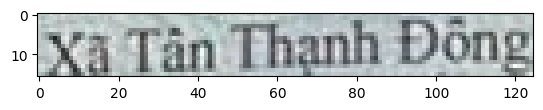

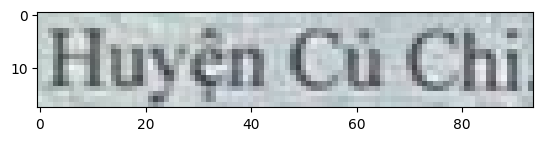

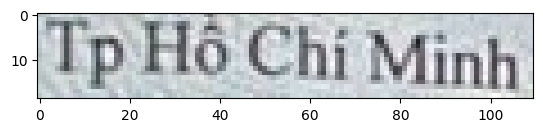

In [ ]:
saveCroppedImg('DC', image)

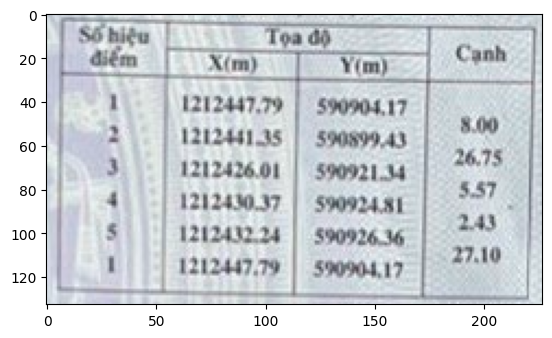

In [ ]:
tb = display_img(image, data["B"][0], data["B"][1], data["B"][2], data["B"][3])

In [ ]:
!git clone https://github.com/Belval/TextRecognitionDataGenerator.git

Cloning into 'TextRecognitionDataGenerator'...
remote: Enumerating objects: 1589, done.
remote: Total 1589 (delta 0), reused 0 (delta 0), pack-reused 1589
Receiving objects: 100% (1589/1589), 152.64 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (665/665), done.
Updating files: 100% (576/576), done.
